## TASK-11

####  AIRSS1237

#### Tejasvani

# **CIFAR-10 - Object Recognition in Images**


# PROBLEM DESCRIPTION : 
---

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

**Abstract**

To Build a model for object recognition of of 60,000 labeled images.


# Loading the dataset 


In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


# Visualise the Dataset

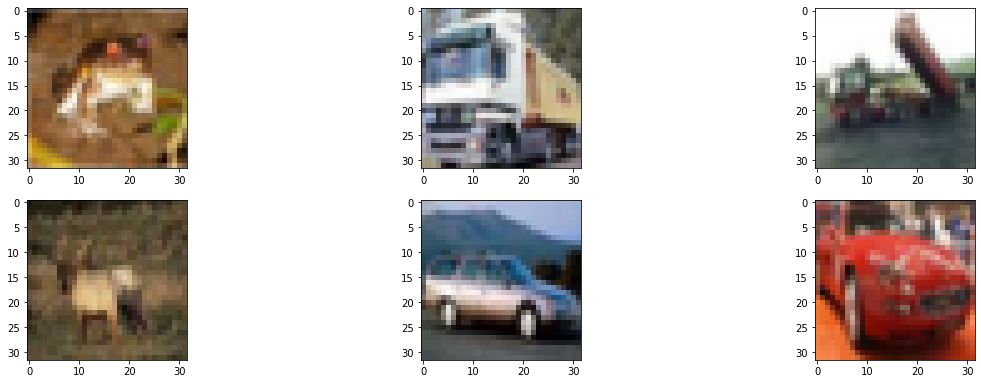

In [2]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
plt.show()

# Import the required libraries 

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# Convert the pixel values of the dataset to float type and then normalize the dataset

In [4]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')

train_X=train_X/255.0
test_X=test_X/255.0

# one-hot encoding 

In [5]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)

num_classes=test_Y.shape[1]

# Building the model 

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
padding='same',activation='relu',
kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model

In [7]:
sgd=SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)

model.compile(loss='categorical_crossentropy',
optimizer=sgd,
metrics=['accuracy'])

# Model Summary 

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

# Model chart

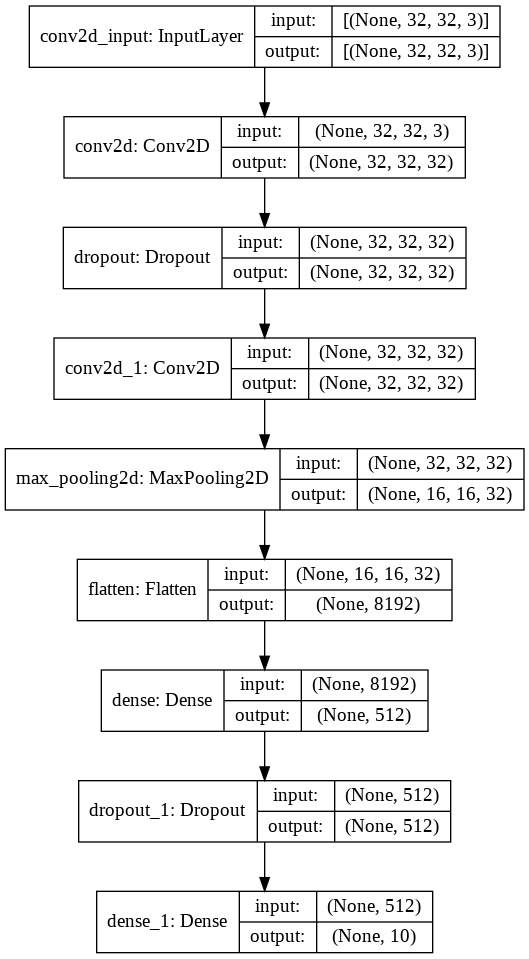

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

#  Train the model 

In [10]:
model.fit(train_X,train_Y,
validation_data=(test_X,test_Y),
epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 214s 136ms/step - loss: 1.6743 - accuracy: 0.3898 - val_loss: 1.3410 - val_accuracy: 0.5137
Epoch 2/10
1563/1563 [==============================] - 210s 135ms/step - loss: 1.3169 - accuracy: 0.5261 - val_loss: 1.1921 - val_accuracy: 0.5798
Epoch 3/10
1563/1563 [==============================] - 212s 135ms/step - loss: 1.1475 - accuracy: 0.5915 - val_loss: 1.0655 - val_accuracy: 0.6158
Epoch 4/10
1563/1563 [==============================] - 212s 136ms/step - loss: 1.0276 - accuracy: 0.6348 - val_loss: 1.0244 - val_accuracy: 0.6376
Epoch 5/10
1563/1563 [==============================] - 213s 137ms/step - loss: 0.9351 - accuracy: 0.6666 - val_loss: 0.9915 - val_accuracy: 0.6502
Epoch 6/10
1563/1563 [==============================] - 213s 136ms/step - loss: 0.8582 - accuracy: 0.6957 - val_loss: 0.9711 - val_accuracy: 0.6637
Epoch 7/10
1563/1563 [==============================] - 213s 136ms/step - loss: 0.7908 - accuracy: 0.7210 - val_

# Calculate its accuracy on testing data

In [11]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 8s 27ms/step - loss: 0.9433 - accuracy: 0.6813
68.12999844551086


# Save the model 

In [12]:
model.save("model_cifar_10.h5")